In [12]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from scipy.spatial.distance import cdist
from sklearn import preprocessing 
from sklearn.metrics import silhouette_samples, silhouette_score

In [13]:
# Import Input Dataset
customer_data = pd.read_csv('Customer Segmentation/Mall_Customers.csv')

customer_data.info()
customer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
label_encoder = preprocessing.LabelEncoder()
customer_data['Gender']= label_encoder.fit_transform(customer_data['Gender'])
customer_data['Gender'].unique()

array([1, 0])

In [15]:

#Null values computation
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

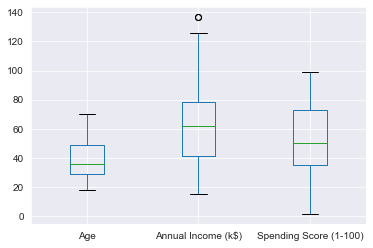

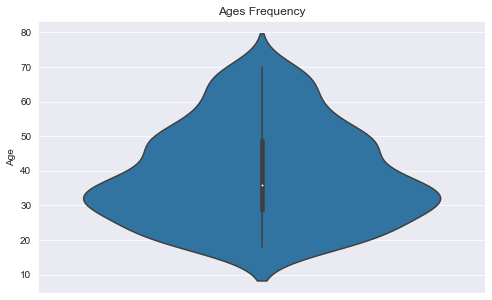

In [16]:
customer_data.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'])

plt.figure(figsize=(8,5))
plt.title("Ages Frequency")
sns.axes_style("dark")
age=customer_data['Age']
sns.violinplot(y=age)
plt.show()

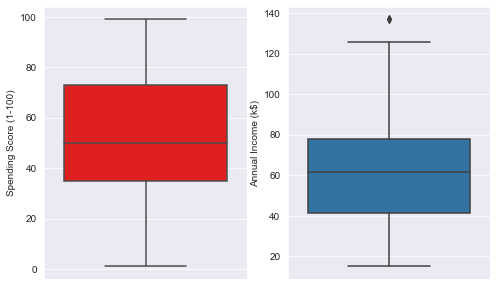

In [17]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(y=customer_data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=customer_data["Annual Income (k$)"])
plt.show()

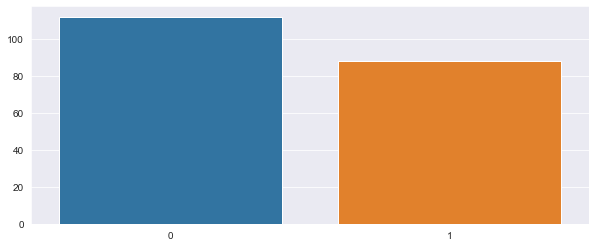

In [18]:
genders = customer_data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

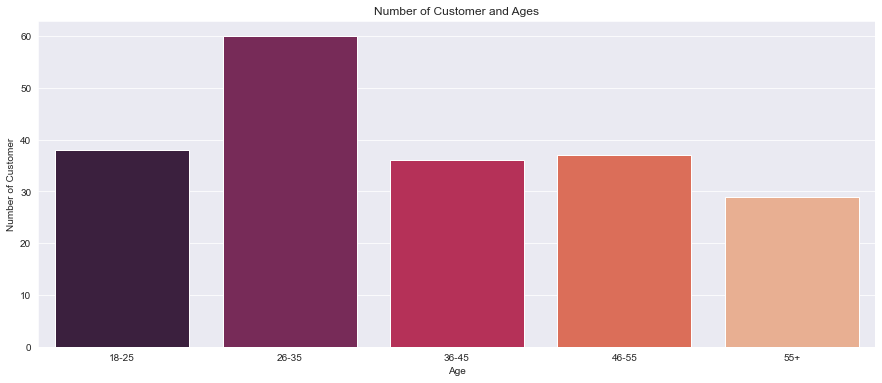

In [19]:
age18_25 = customer_data.Age[(customer_data.Age <= 25) & (customer_data.Age >= 18)]
age26_35 = customer_data.Age[(customer_data.Age <= 35) & (customer_data.Age >= 26)]
age36_45 = customer_data.Age[(customer_data.Age <= 45) & (customer_data.Age >= 36)]
age46_55 = customer_data.Age[(customer_data.Age <= 55) & (customer_data.Age >= 46)]
age55above = customer_data.Age[customer_data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

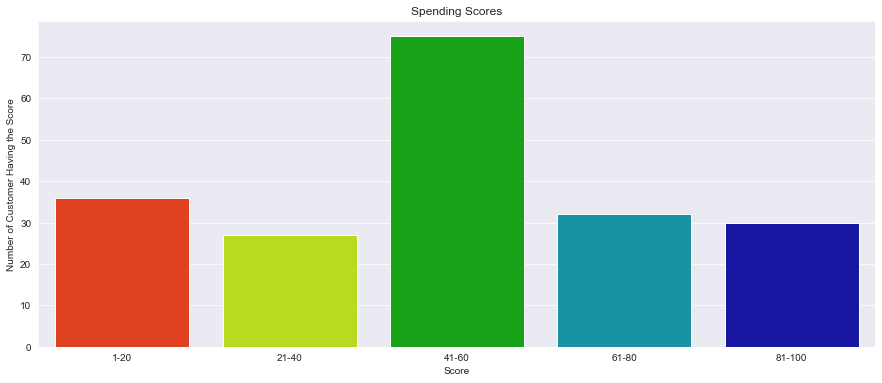

In [20]:
ss1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Text(0, 0.5, 'Number of Customers')

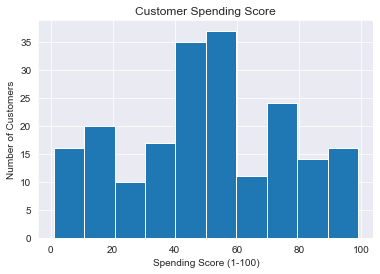

In [21]:

plt.hist(customer_data['Spending Score (1-100)'])
 
# Add title and axis names
plt.title('Customer Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

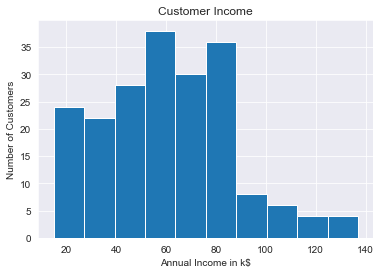

In [22]:
plt.hist(customer_data['Annual Income (k$)'])
 
# Add title and axis names
plt.title('Customer Income')
plt.xlabel('Annual Income in k$')
plt.ylabel('Number of Customers')

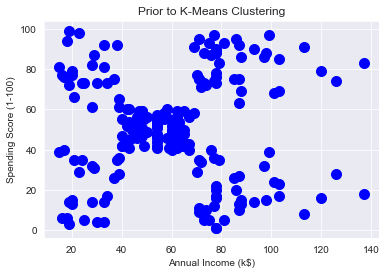

In [23]:
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], s = 100, c = 'blue')
plt.title('Prior to K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

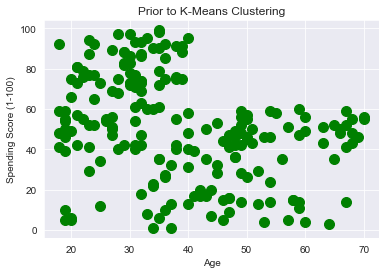

In [24]:
plt.scatter(customer_data['Age'], customer_data['Spending Score (1-100)'], s = 100, c = 'green')
plt.title('Prior to K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()



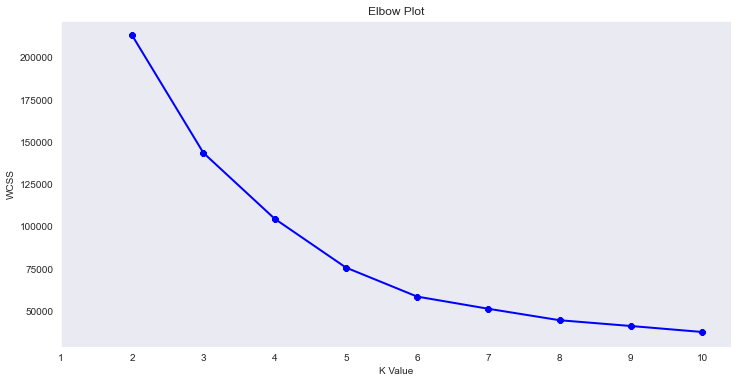

<class 'numpy.ndarray'>


In [25]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    cluster_labels=kmeans.fit(customer_data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.title('Elbow Plot')
plt.ylabel("WCSS")
plt.show()
print(type(np.array(customer_data.iloc[:,1:])))

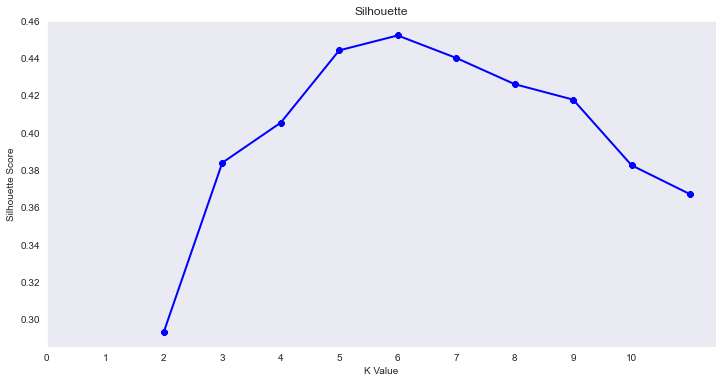

In [26]:
# Silhouette Method
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 12):
  kmeans = KMeans(n_clusters = k).fit(customer_data.iloc[:,1:])
  labels = kmeans.labels_
  sil.append(silhouette_score(customer_data.iloc[:,1:], labels, metric = 'euclidean'))

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,12),sil, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(0,11,1))
plt.title('Silhouette')
plt.ylabel("Silhouette Score")
plt.show()